# TP4 - Primeira Parte

## 1. Problemas observados no trabalho anterior:

Durante a realização da 2a Parte do Trabalho 2, um dos problemas bastante notável foi a questão de suavilizar as bordas da máscara. Para que a imagem não ficasse com aparência aspera (píxels bastante nítidos nas bordas), foi utilizado o Desfoque Gaussiano que atenuou esse defeito, porem, a imagem utilizada como experimento é bastante minuciosa em alguns detalhes e, após esse experimento, percebe-se que alguns pixels foram dissolvidos (perdidos). As correntes que a Miley segura por exemplo é um exempplo válido dessa perda.

# 2. Solução:

## Código Modificado:

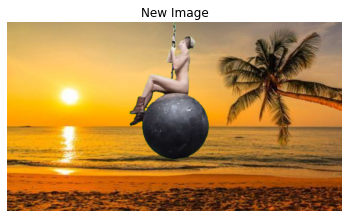

In [22]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


def join_Images(foreground_Img, background_Img):
    def generate_Mask(BGR_img):    
        HSV_img = cv.cvtColor(BGR_img, cv.COLOR_BGR2HSV)
        
        lower_Green = np.array([54, 110, 127])
        upper_Green = np.array([69, 255, 255])
        
        green_Mask = cv.inRange(HSV_img, lower_Green, upper_Green)
        
        invert_Mask = 255 - green_Mask
        
        kernel = cv.getStructuringElement(cv.MORPH_RECT, (3, 3))        
        invert_Mask = cv.erode(invert_Mask, kernel, iterations=1)
        invert_Mask = cv.GaussianBlur(invert_Mask, (3, 3), 0)
        
        return invert_Mask
        
    def resize_Image(img):
        
        wight = 1280
        height = 720
        points = (wight, height)
        
        resized_img = cv.resize(img, points, interpolation = cv.INTER_LINEAR)
        
        return resized_img
    
    invert_Mask = generate_Mask(foreground_Img)
       
    foreground_Img = cv.bitwise_and(foreground_Img, foreground_Img, mask = invert_Mask)
    background_Img = resize_Image(background_Img)
    
    invert_Mask = cv.cvtColor(invert_Mask, cv.COLOR_BGR2BGRA).astype(float) / 255
    foreground_Img = cv.cvtColor(foreground_Img, cv.COLOR_BGR2BGRA).astype(float)
    background_Img = cv.cvtColor(background_Img, cv.COLOR_BGR2BGRA).astype(float)
    
    foreground_Img = cv.multiply(invert_Mask, foreground_Img)
    background_Img = cv.multiply(1.0 - invert_Mask, background_Img)
      
    new_Image = cv.add(foreground_Img, background_Img) / 255
    
    plt.title('New Image')
    plt.axis('off')
    plt.imshow(new_Image)
    plt.show()
    
img1 = cv.imread('imagens/miley.jpg')
img2 = cv.imread('imagens/Exemplo_fundo.jpg')

img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

join_Images(img1, img2);

##  3. Conclusão:

Diante dos resultados obtidos, é possível perceber a grande diferença entre os 2 trabalhos. No primeiro trabalho, embora que as bordas da imagem de primeiro plano quase não apresentam pontos ásperos, pode-se perceber que alguns detalhes entraram em detrimento. A corrente por exemplo ficou com um aspecto bem mais fino do que o necessário. Já o segundo trabalho, devido alguns ajustes dos limites da cor verde e também o uso do método erode, foi necessário também utilizar um filtro gaussiano para que a imagem não fique com aspecto mais nítido e gere um resultado satisfatório.